In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dabl
import warnings
warnings.filterwarnings('ignore')

# 1.1 Data wrangling

## Objective - Explore Raw Score Data 
- 1 import packages
- 2 load data 
- 3 join data on school code 
- 4 observe nulls and remove -  special characters

In [3]:
# Load raw scores data 
dfs = pd.read_csv('../../../data/raw/school_level/sb_ca2021_all_csv_v2/sb_ca2021_all_csv_v2.txt' ,delimiter = "^",low_memory=False)
dfs.drop('Filler',axis=1,inplace=True)
dfs.shape

(3586711, 32)

In [6]:
## check nulls 
m = pd.DataFrame([dfs.isnull().sum(),100*dfs.isnull().mean()])
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.head(10)


,count,%
Mean Scale Score,2683870.0,74.828164
Percentage Standard Nearly Met,2355727.0,65.679309
Area 1 Percentage Above Standard,2355727.0,65.679309
Area 1 Percentage Near Standard,2355727.0,65.679309
Percentage Standard Met and Above,2355727.0,65.679309
Percentage Standard Met,2355727.0,65.679309
Percentage Standard Exceeded,2355727.0,65.679309
Area 1 Percentage Below Standard,2355727.0,65.679309
Area 2 Percentage Above Standard,2355727.0,65.679309
Area 2 Percentage Near Standard,2355727.0,65.679309


## Over 70 % nulls in lots of columns regarless of df slice

In [7]:
## convert features to numbers 
cols = dfs.columns[dfs.dtypes.eq('object')]
cols
convert = cols[1:]
convert

Index(['Total Tested at Reporting Level',
       'Total Tested with Scores at Reporting Level', 'Students Enrolled',
       'Students Tested', 'Mean Scale Score', 'Percentage Standard Exceeded',
       'Percentage Standard Met', 'Percentage Standard Met and Above',
       'Percentage Standard Nearly Met', 'Percentage Standard Not Met',
       'Students with Scores', 'Area 1 Percentage Above Standard',
       'Area 1 Percentage Near Standard', 'Area 1 Percentage Below Standard',
       'Area 2 Percentage Above Standard', 'Area 2 Percentage Near Standard',
       'Area 2 Percentage Below Standard', 'Area 3 Percentage Above Standard',
       'Area 3 Percentage Near Standard', 'Area 3 Percentage Below Standard',
       'Area 4 Percentage Above Standard', 'Area 4 Percentage Near Standard',
       'Area 4 Percentage Below Standard'],
      dtype='object')

In [8]:
print(dfs['Mean Scale Score'].isnull().sum())
dfs[convert] = dfs[convert].apply(pd.to_numeric,errors='coerce')
print(dfs['Mean Scale Score'].isnull().sum())

2683870
3154643


## drop nulls for target 

In [9]:
dfs.drop(dfs[dfs['Mean Scale Score'].isnull()].index,inplace = True)

## check unique vales for schools and districs 

In [10]:
dfs['School Code'].nunique()

3152

In [11]:
dfs['District Code'].nunique()

653

## only 30 % of schools are left when removing null mean scale scores

In [12]:
dfs['Test ID'].value_counts()

2    217888
1    214180
Name: Test ID, dtype: int64

In [13]:
## there are only 432 k viable rows

dfs.shape[0]-dfs['Mean Scale Score'].isnull().sum()

432068

In [14]:
print(dfs['Mean Scale Score'].isnull().sum())

0


## leave as using mean scale score

In [15]:
## check nulls 
m = pd.DataFrame([dfs[dfs['Student Group ID']==1].isnull().sum(),100*dfs[dfs['Student Group ID']==1].isnull().mean()])
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.head(10)

,count,%
Area 4 Percentage Below Standard,4961.0,22.17504
Area 4 Percentage Near Standard,4961.0,22.17504
Area 4 Percentage Above Standard,4961.0,22.17504
Area 3 Percentage Below Standard,4961.0,22.17504
Area 3 Percentage Near Standard,4961.0,22.17504
Area 3 Percentage Above Standard,4961.0,22.17504
Area 2 Percentage Below Standard,4961.0,22.17504
Area 2 Percentage Near Standard,4961.0,22.17504
Area 2 Percentage Above Standard,4961.0,22.17504
Area 1 Percentage Below Standard,4961.0,22.17504


In [16]:
## check nulls 
m = pd.DataFrame([dfs[dfs['Student Group ID']==4].isnull().sum(),100*dfs[dfs['Student Group ID']==4].isnull().mean()])
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.head(10)

,count,%
Area 4 Percentage Below Standard,7162.0,37.639268
Area 4 Percentage Near Standard,7162.0,37.639268
Area 4 Percentage Above Standard,7162.0,37.639268
Area 3 Percentage Below Standard,7162.0,37.639268
Area 3 Percentage Near Standard,7162.0,37.639268
Area 3 Percentage Above Standard,7162.0,37.639268
Area 2 Percentage Below Standard,7162.0,37.639268
Area 2 Percentage Near Standard,7162.0,37.639268
Area 2 Percentage Above Standard,7162.0,37.639268
Area 1 Percentage Below Standard,7162.0,37.639268


### 70 % of all rows even when looking at subsets of the student group are null, need to cut down to clean data 

In [17]:
# print(len(dfs))
# drops = dfs[dfs['Students Tested']=='0'].index
# len(drops)
# dfs= dfs.drop(drops)
# print(len(dfs))

#check nulls gone 
dfs[dfs['Students Tested']=='0']

,County Code,District Code,School Code,Test Year,Student Group ID,Test Type,Total Tested at Reporting Level,Total Tested with Scores at Reporting Level,Grade,Test ID,...,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,Type ID


In [18]:
dfs.shape

(432068, 32)

In [19]:
dfs['Student Group ID'].value_counts()

1      22372
29     22351
51     22330
53     22251
99     21886
6      21722
180    20328
3      19420
4      19028
31     18158
78     16504
111    15710
170    13797
204    13635
80     13192
92     12904
91     11900
93     11456
226    10065
160     9621
142     9494
8       9020
224     8082
94      7794
128     7713
90      7492
206     5969
121     4458
76      4402
144     3977
222     3083
227     2797
7       2674
74      2518
202     2007
52      1846
200     1795
77      1416
207     1180
223     1002
50       958
220      805
28       779
75       501
203      496
201      353
79       303
205      168
225      134
221      108
120       98
190       11
243        5
Name: Student Group ID, dtype: int64

In [20]:
dfs[dfs['School Code']==0][['County Code','District Code','School Code']].nunique()

County Code       58
District Code    594
School Code        1
dtype: int64

In [21]:
dfs[dfs['School Code']==112607]['Student Group ID'].unique()

array([  1,   6,  29,  31,  51,  53,  99, 180,   3,  74,  92,   4,   8,
        78,  90,  91,  93, 111, 142, 160, 170, 200, 204])

## looks like if the there are not alot of students in a group the scores are with held. only had enough scores for 11th grade, if this is a trend I can use just those students instead of the slower schools 

In [22]:
## Can drop all School where no students were tested

In [23]:
dfs.duplicated(subset=['School Code','District Code','County Code']).sum()

428266

In [24]:
dfs.duplicated(subset=['Grade','Test ID','School Code','District Code']).sum()

410477

In [25]:
dfs.duplicated(subset=['Grade','Test ID','School Code','District Code','County Code']).sum()

409696

In [26]:
dfs.duplicated(subset=['Grade','Student Group ID','Test ID','School Code','District Code','County Code']).sum()

0

## To get unique row identifier need to use 6 columns listed above

In [27]:
print(dfs[dfs['District Code']==10017].shape)
print(dfs[dfs['District Code']==10017].isnull().sum())

(550, 32)
County Code                                      0
District Code                                    0
School Code                                      0
Test Year                                        0
Student Group ID                                 0
Test Type                                        0
Total Tested at Reporting Level                  0
Total Tested with Scores at Reporting Level      0
Grade                                            0
Test ID                                          0
Students Enrolled                                0
Students Tested                                  0
Mean Scale Score                                 0
Percentage Standard Exceeded                     0
Percentage Standard Met                          0
Percentage Standard Met and Above                0
Percentage Standard Nearly Met                   0
Percentage Standard Not Met                      0
Students with Scores                             0
Area 1 Percentage Abo

## load school / district name data to be joined to scores data 

In [28]:
entities = pd.read_csv('../../../data/raw/sb_ca2021entities_csv.txt',delimiter='^')
entities.drop('Filler',axis=1,inplace=True)
entities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11149 entries, 0 to 11148
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   County Code    11149 non-null  int64  
 1   District Code  11149 non-null  int64  
 2   School Code    11149 non-null  int64  
 3   Test Year      11149 non-null  int64  
 4   Type ID        11149 non-null  int64  
 5   County Name    11149 non-null  object 
 6   District Name  11090 non-null  object 
 7   School Name    10099 non-null  object 
 8   Zip Code       10099 non-null  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 784.0+ KB


In [29]:
entities['School Code'].nunique()

10100

In [30]:
entities.head()

,County Code,District Code,School Code,Test Year,Type ID,County Name,District Name,School Name,Zip Code
0,0,0,0,2021,4,State of California,NaN,NaN,NaN
1,1,0,0,2021,5,Alameda,NaN,NaN,NaN
2,1,10017,0,2021,6,Alameda,Alameda County Office of Education,NaN,NaN
3,1,10017,112607,2021,9,Alameda,Envision Academy for Arts & Technology,Envision Academy for Arts & Technology,94612.0
4,1,10017,124172,2021,9,Alameda,Yu Ming Charter,Yu Ming Charter,94608.0


In [31]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432068 entries, 0 to 3586066
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   County Code                                  432068 non-null  int64  
 1   District Code                                432068 non-null  int64  
 2   School Code                                  432068 non-null  int64  
 3   Test Year                                    432068 non-null  int64  
 4   Student Group ID                             432068 non-null  int64  
 5   Test Type                                    432068 non-null  object 
 6   Total Tested at Reporting Level              432068 non-null  float64
 7   Total Tested with Scores at Reporting Level  432068 non-null  float64
 8   Grade                                        432068 non-null  int64  
 9   Test ID                                      432068 non-nu

## merge data sets

In [32]:
df = dfs.merge(entities,how='left',on=['School Code','District Code','County Code'])
df.drop('Test Type' ,inplace=True,axis=1) # all are 'B'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432068 entries, 0 to 432067
Data columns (total 37 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   County Code                                  432068 non-null  int64  
 1   District Code                                432068 non-null  int64  
 2   School Code                                  432068 non-null  int64  
 3   Test Year_x                                  432068 non-null  int64  
 4   Student Group ID                             432068 non-null  int64  
 5   Total Tested at Reporting Level              432068 non-null  float64
 6   Total Tested with Scores at Reporting Level  432068 non-null  float64
 7   Grade                                        432068 non-null  int64  
 8   Test ID                                      432068 non-null  int64  
 9   Students Enrolled                            432068 non-nul

In [33]:
df['Test ID'].value_counts()

2    217888
1    214180
Name: Test ID, dtype: int64

In [34]:
df[['County Code', 'District Code','School Code']].nunique()

County Code        58
District Code     653
School Code      3152
dtype: int64

In [35]:
## check nulls 
m = pd.DataFrame([df.isnull().sum(),100*df.isnull().mean()])
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.head(10)


,count,%
Area 1 Percentage Above Standard,174867.0,40.472102
Area 1 Percentage Near Standard,174867.0,40.472102
Area 4 Percentage Below Standard,174867.0,40.472102
Area 4 Percentage Near Standard,174867.0,40.472102
Area 4 Percentage Above Standard,174867.0,40.472102
Area 3 Percentage Below Standard,174867.0,40.472102
Area 3 Percentage Near Standard,174867.0,40.472102
Area 3 Percentage Above Standard,174867.0,40.472102
Area 2 Percentage Below Standard,174867.0,40.472102
Area 2 Percentage Near Standard,174867.0,40.472102


In [36]:
df[df['School Name'].isnull()][:7].T

,0,1,2,3,4,5,6
County Code,0,0,0,0,0,0,0
District Code,0,0,0,0,0,0,0
School Code,0,0,0,0,0,0,0
Test Year_x,2021,2021,2021,2021,2021,2021,2021
Student Group ID,1,3,4,6,7,8,28
Total Tested at Reporting Level,743626.0,375522.0,367928.0,628259.0,31747.0,161586.0,5984.0
Total Tested with Scores at Reporting Level,736192.0,371742.0,364279.0,622358.0,31503.0,159396.0,5921.0
Grade,3,3,3,3,3,3,3
Test ID,1,1,1,1,1,1,1
Students Enrolled,432992.0,221170.0,211800.0,320066.0,15481.0,35618.0,3531.0


In [37]:
df[df['County Name']=='State of California'].shape

(727, 37)

In [38]:
cali_avgs = df[df['County Name']=='State of California']
cali_avgs.to_csv('../../../data/state_level/all_state_scores.csv')

## Remove state averages from data set 

In [39]:
df.drop(cali_avgs.index,inplace=True)
df.shape

(431341, 37)

In [40]:
df[df['School Name'].isnull()][-15:].T

,431685,431686,431687,431688,431689,431690,431691,431692,431693,431694,431695,431696,431697,431698,431699
County Code,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58
District Code,72751,72751,72751,72751,72751,72751,72751,72751,72751,72751,72751,72751,72751,72751,72751
School Code,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Test Year_x,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021
Student Group ID,78,80,91,92,93,94,99,111,144,170,180,204,206,224,226
Total Tested at Reporting Level,213.0,400.0,115.0,299.0,203.0,88.0,669.0,432.0,87.0,80.0,667.0,116.0,139.0,97.0,261.0
Total Tested with Scores at Reporting Level,213.0,400.0,115.0,299.0,203.0,88.0,669.0,432.0,87.0,80.0,667.0,116.0,139.0,97.0,261.0
Grade,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Test ID,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Students Enrolled,32.0,77.0,19.0,64.0,27.0,17.0,127.0,81.0,13.0,19.0,114.0,19.0,25.0,13.0,52.0


## check key columns are clean 

In [41]:
df['School Code'].isnull().sum()

0

In [42]:
df['Mean Scale Score'].isnull().sum()

0

In [43]:
df.shape

(431341, 37)

## leave blank school names as they are probably district and county averages for later


In [44]:
# # remove rows with no school Name 
# print('before removing no school name', len(df))
# df.drop(df[df['School Name'].isnull()].index,inplace=True)
# # # remove area score nulls
# # df.drop(df[df['Area 2 Percentage Below Standard'].isnull()].index,inplace=True)
# # print('after removing no school name', len(df))


# ## check nulls 
# m = pd.DataFrame([df.isnull().sum(),100*df.isnull().mean()])
# m = m.T
# m.columns=['count', '%']
# m = m.sort_values(by='count',ascending=False)
# m.head(10)


In [45]:
print('after removing no school name', len(df))

after removing no school name 431341


In [46]:

df.drop(df[df['Mean Scale Score'].isnull()].index,inplace = True)
## check nulls 
m = pd.DataFrame([df.isnull().sum(),100*df.isnull().mean()])
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.head(3)


,count,%
Area 1 Percentage Above Standard,174856.0,40.537765
Area 1 Percentage Near Standard,174856.0,40.537765
Area 4 Percentage Below Standard,174856.0,40.537765


In [47]:
df.shape

(431341, 37)

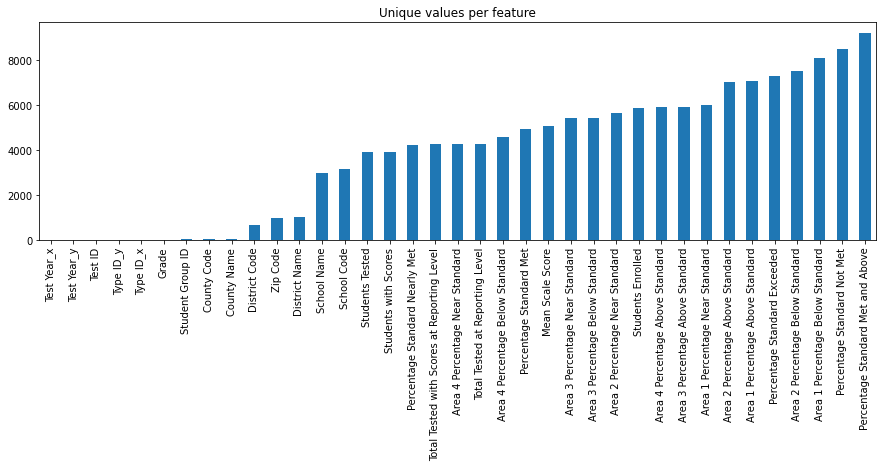

In [48]:
# find number of unique entries for each features
unique_values = df.nunique().sort_values()
# select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar( figsize=(15, 4), title="Unique values per feature")
plt.show()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431341 entries, 727 to 432067
Data columns (total 37 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   County Code                                  431341 non-null  int64  
 1   District Code                                431341 non-null  int64  
 2   School Code                                  431341 non-null  int64  
 3   Test Year_x                                  431341 non-null  int64  
 4   Student Group ID                             431341 non-null  int64  
 5   Total Tested at Reporting Level              431341 non-null  float64
 6   Total Tested with Scores at Reporting Level  431341 non-null  float64
 7   Grade                                        431341 non-null  int64  
 8   Test ID                                      431341 non-null  int64  
 9   Students Enrolled                            431341 non-n

## add student group and test id labels 

In [50]:
groups = pd.read_csv('../../../data/raw/StudentGroups 2.txt',delimiter='^')
groups.rename(columns={'Demographic ID':'Student Group ID'},inplace=True)
groups.tail(8)

,Student Group ID,Demographic ID Num,Demographic Name,Student Group
47,94,94,Graduate school/Post graduate,Parent Education
48,121,121,Declined to state,Parent Education
49,50,50,Armed forces family member,Military Status
50,51,51,Not armed forces family member,Military Status
51,52,52,Homeless,Homeless Status
52,53,53,Not homeless,Homeless Status
53,240,240,Foster youth,Foster Status
54,241,241,Not foster youth,Foster Status


In [51]:
df = df.merge(groups, on='Student Group ID',how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431341 entries, 0 to 431340
Data columns (total 40 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   County Code                                  431341 non-null  int64  
 1   District Code                                431341 non-null  int64  
 2   School Code                                  431341 non-null  int64  
 3   Test Year_x                                  431341 non-null  int64  
 4   Student Group ID                             431341 non-null  int64  
 5   Total Tested at Reporting Level              431341 non-null  float64
 6   Total Tested with Scores at Reporting Level  431341 non-null  float64
 7   Grade                                        431341 non-null  int64  
 8   Test ID                                      431341 non-null  int64  
 9   Students Enrolled                            431341 non-nul

In [52]:
# convert test types to name 
df['Test ID'] = df['Test ID'].map({1:'English Language Arts/Literacy',2:'Mathematics'})
df['Test ID'].unique()

array(['English Language Arts/Literacy', 'Mathematics'], dtype=object)

In [55]:
df.sample(4).T

,203542,65653,46757,421595
County Code,31,13,10,56
District Code,66795,63131,62547,72652
School Code,6031066,6008502,136523,6062145
Test Year_x,2021,2021,2021,2021
Student Group ID,31,94,226,31
Total Tested at Reporting Level,95.0,89.0,13.0,423.0
Total Tested with Scores at Reporting Level,95.0,88.0,13.0,418.0
Grade,8,8,11,8
Test ID,Mathematics,Mathematics,Mathematics,English Language Arts/Literacy
Students Enrolled,19.0,22.0,13.0,189.0


In [57]:
df[df['Demographic Name']=='Female']['School Code'].nunique()

2796

In [58]:
df[df['Demographic Name']=='Male']['School Code'].nunique()

2867

In [59]:
df[df['Demographic Name']=='Filipino']['School Code'].nunique()

252

<AxesSubplot:>

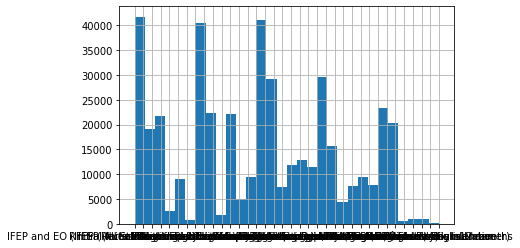

In [60]:
df['Demographic Name'].hist(bins=30)

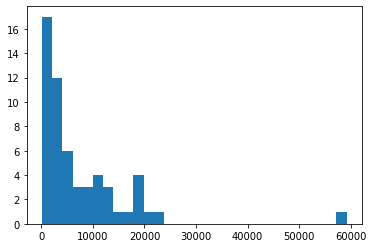

In [61]:
dist_nums = df['County Name'].value_counts()
plt.hist(dist_nums,bins=30)
plt.show()

In [62]:
## per county reporting school count

In [63]:
df['County Name'].value_counts().head(5)

Los Angeles    59184
San Joaquin    22638
San Diego      21688
San Mateo      18341
Stanislaus     18281
Name: County Name, dtype: int64

Target looks like regression
Showing only top 10 of 22 continuous features


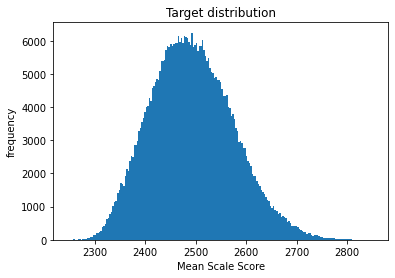

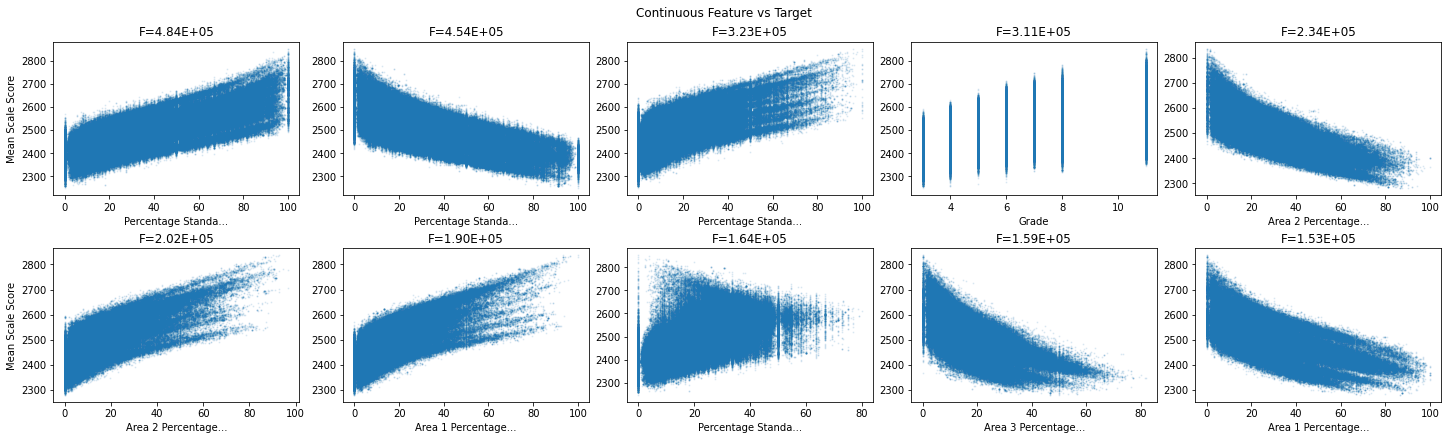

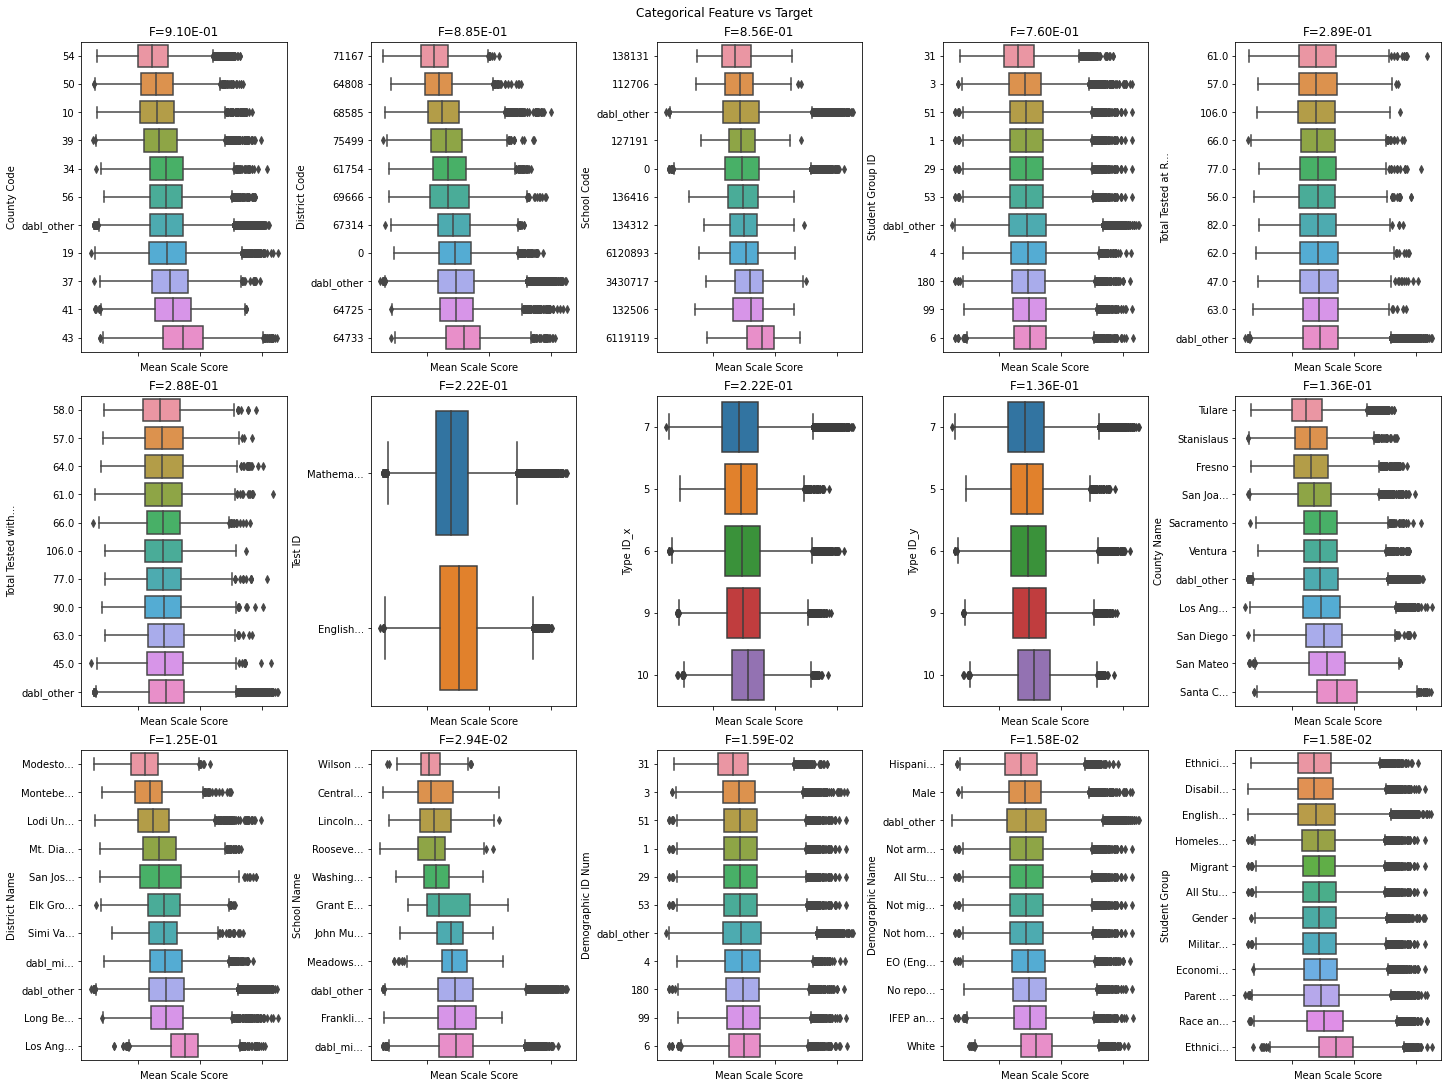

In [64]:
dabl.plot(df, target_col = 'Mean Scale Score')
plt.show()

In [65]:
df['School Code'].nunique()

3152

In [66]:
df['Percentage Standard Exceeded'].nunique() 

7283

## over 400k rows cleaned and ready for other joins 

In [67]:
df.to_csv('../../../data/by_student_group/2021-SB_math_ela_scores.csv')

In [74]:
df.shape

(431341, 40)

In [69]:
score_means = df.groupby('County Name')[['Percentage Standard Met','Percentage Standard Exceeded','Percentage Standard Not Met']].mean()
score_means['difference'] = score_means['Percentage Standard Exceeded']-score_means['Percentage Standard Not Met']
score_means.sort_values(by='Percentage Standard Exceeded',ascending=False).head(7)

,Percentage Standard Met,Percentage Standard Exceeded,Percentage Standard Not Met,difference
County Name,,,,
Santa Clara,22.513650,36.379555,23.301919,13.077635
Santa Cruz,28.344314,30.812468,18.893656,11.918812
San Mateo,24.110998,29.406809,25.883117,3.523692
Napa,27.666601,28.914706,19.375556,9.539150
Alameda,24.681694,27.032306,26.978996,0.053310
Marin,24.658342,23.790939,28.730503,-4.939564
Trinity,29.301570,23.443236,22.480129,0.963107


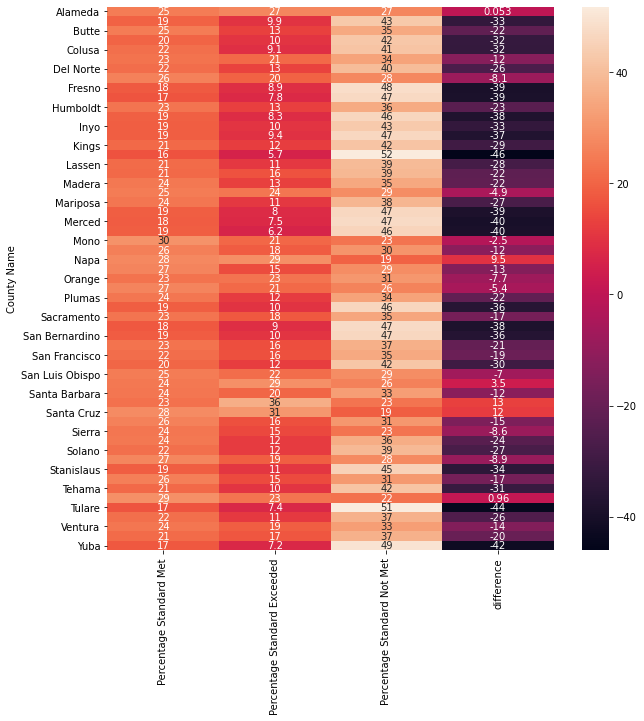

In [70]:
import seaborn as sns
ax,plot = plt.subplots(figsize=(10,10))
ax = sns.heatmap(score_means,annot=True)

In [71]:
district_means = df.groupby(['District Name','Test ID'])[['Percentage Standard Met','Percentage Standard Exceeded','Percentage Standard Not Met']].mean()
district_means['difference'] = district_means['Percentage Standard Exceeded']-district_means['Percentage Standard Not Met']
district_means.sort_values(by='Percentage Standard Exceeded',ascending=False).head(15)

Percentage Standard Met  \
District Name             Test ID                                                   
University High           English Language Arts/Literacy                21.355652   
Bullis Charter            Mathematics                                   17.030080   
Yu Ming Charter           Mathematics                                   16.635213   
Union Street Charter      English Language Arts/Literacy                16.697500   
Cold Spring Elementary    Mathematics                                   23.559808   
Fremont Union High        Mathematics                                   14.666774   
                          English Language Arts/Literacy                19.531475   
San Ramon Valley Unified  English Language Arts/Literacy                22.739245   
ABC Unified               English Language Arts/Literacy                23.759653   
Albany City Unified       English Language Arts/Literacy                22.378519   
Berkeley Unified          English Language Arts/Literacy                27.980588   
Lompoc Unified            English Language Arts/Literacy                19.550000   
Saratoga Union Elementary Mathematics                                   19.461919   
Las Lomitas Elementary    Mathematics                                   18.807348   
Cold Spring Elementary    English Language Arts/Literacy                32.516538   

                                                          Percentage Standard Exceeded  \
District Name             Test ID                                                        
University High           English Language Arts/Literacy                     77.872609   
Bullis Charter            Mathematics                                        74.764480   
Yu Ming Charter           Mathematics                                        74.244574   
Union Street Charter      English Language Arts/Literacy                     73.473929   
Cold Spring Elementary    Mathematics                                        71.910192   
Fremont Union High        Mathematics                                        71.888710   
                          English Language Arts/Literacy                     71.296066   
San Ramon Valley Unified  English Language Arts/Literacy                     70.811887   
ABC Unified               English Language Arts/Literacy                     70.488069   
Albany City Unified       English Language Arts/Literacy                     68.059630   
Berkeley Unified          English Language Arts/Literacy                     67.765294   
Lompoc Unified            English Language Arts/Literacy                     67.595714   
Saratoga Union Elementary Mathematics                                        67.109593   
Las Lomitas Elementary    Mathematics                                        66.576435   
Cold Spring Elementary    English Language Arts/Literacy                     65.427500   

                                                          Percentage Standard Not Met  \
District Name             Test ID                                                       
University High           English Language Arts/Literacy                     0.772174   
Bullis Charter            Mathematics                                        1.826800   
Yu Ming Charter           Mathematics                                        1.369787   
Union Street Charter      English Language Arts/Literacy                     2.214643   
Cold Spring Elementary    Mathematics                                        0.000000   
Fremont Union High        Mathematics                                        6.072661   
                          English Language Arts/Literacy                     1.881803   
San Ramon Valley Unified  English Language Arts/Literacy                     0.000000   
ABC Unified               English Language Arts/Literacy                     1.985212   
Albany City Unified       English Language Arts/Literacy                     2.436296   
Berkeley Unif

In [72]:
score_means.sample(5)

,Percentage Standard Met,Percentage Standard Exceeded,Percentage Standard Not Met,difference
County Name,,,,
Madera,23.900283,12.994466,34.697878,-21.703412
Fresno,17.994510,8.862765,48.149051,-39.286285
Calaveras,19.941114,10.269072,42.344146,-32.075074
Los Angeles,20.914407,16.409350,38.556337,-22.146987
Colusa,22.029473,9.149493,41.455527,-32.306034


In [73]:
district_means.sort_values(by='Percentage Standard Exceeded').head(15)

Percentage Standard Met  \
District Name                            Test ID                                                   
Los Banos Unified                        Mathematics                                    2.835759   
IvyTech Charter                          Mathematics                                   15.401429   
Kern County Office of Education          Mathematics                                    0.000000   
Kid Street Learning Center Charter       Mathematics                                   11.902857   
Linden Unified                           English Language Arts/Literacy                15.981111   
                                         Mathematics                                    0.000000   
Loleta Union Elementary                  English Language Arts/Literacy                 4.870714   
                                         Mathematics                                    0.000000   
Los Angeles Academy of Arts and Enterpri Mathematics                                    0.000000   
one.Charter                              English Language Arts/Literacy                20.430000   
Ipakanni Early College Charter           Mathematics                                    8.330000   
Madera County Superintendent of Schools  Mathematics                                    0.000000   
Marconi Learning Academy                 Mathematics                                    2.114500   
Marin County Office of Education         English Language Arts/Literacy                27.270000   
Merced County Office of Education        Mathematics                                    4.707321   

                                                                         Percentage Standard Exceeded  \
District Name                            Test ID                                                        
Los Banos Unified                        Mathematics                                              0.0   
IvyTech Charter                          Mathematics                                              0.0   
Kern County Office of Education          Mathematics                                              0.0   
Kid Street Learning Center Charter       Mathematics                                              0.0   
Linden Unified                           English Language Arts/Literacy                           0.0   
                                         Mathematics                                              0.0   
Loleta Union Elementary                  English Language Arts/Literacy                           0.0   
                                         Mathematics                                              0.0   
Los Angeles Academy of Arts and Enterpri Mathematics                                              0.0   
one.Charter                              English Language Arts/Literacy                           0.0   
Ipakanni Early College Charter           Mathematics                                              0.0   
Madera County Superintendent of Schools  Mathematics                                              0.0   
Marconi Learning Academy                 Mathematics                                              0.0   
Marin County Office of Education         English Language Arts/Literacy                           0.0   
Merced County Office of Education        Mathematics                                              0.0   

                                                                         Percentage Standard Not Met  \
District Name                            Test ID                                                       
Los Banos Unified                        Mathematics                                       81.254494   
IvyTech Charter                          Mathematics                                       78.200000   
Kern County Office of Education          Mathematics                                       91.989469   
Kid Street Learning Center Charter       Mathematics              